# Майнор по Анализу Данных, Группа ИАД-2
## 08/02/2017 Метод kNN, введение в sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [2]:
try:
    from ipywidgets import interact, IntSlider, fixed
    from utils import *
except ImportError:
    print u'Так надо'

# Метод k-ближайших соседей
Вспомним теоретическую базу метода kNN.

## Общая постановка задачи МО
* Множество объектов $O$
* Каждому объекту $o \in O$ можно поставить в соответствие набор признаков $(x, y)$ где
    * $x \in X$ - вектор описательных признаков
    * $y \in Y$ - целевой признак
* Существует неизвестная зависимость $f:X \rightarrow Y$

**Задачи:**
1. Используя конечный набор примеров $(x, y)$, найти алгоритм (решающую функцию) $a(x) = (\hat{y})$, аппроксимирующую $f(x)$
2. Применить алгоритм $a(x)$ на новых объектах

## Как постросить $a(x)$ из семейства метрических методов (kNN)?

* Гипотеза компактности: "Похожим объектам соответстуют похожие ответы" 
* Необходимо ввести функцию расстояния между объектами (не обязательно метрику)
* Запоминаем обучающую выборку и используем для расчета расстояния

### Самые популярные меры расстояния

$$ d(a, b) = \sum\limits_{i=1}^{D}(a_i - b_i)^2 \text{: euclidean distance} $$

$$ d(a, b) = \sum\limits_{i=1}^{D}|a_i - b_i| \text{: manhattan distance} $$

$$ d(a, b) = 1 - \frac{\langle a,b \rangle}{||a||_2\cdot||b||_2} \text{: cosine distance} $$

### Алгоритм (kNN)

Вход: Обучающая выборка $X=(x_i,y_i)$, мера близости $d(\cdot, \cdot)$ и объект $\tilde{x}$<br/>

Найти $k$ ближайших объекта в $X$ c помощью $d(\tilde{x},\cdot)$ 
* (регрессия) вернуть среднее значение* $$\hat{y} = \frac{1}{k}\sum\limits_{j=1}^k y_{(j)}$$
* (классификация) вернуть наиболее частую метку класса $$\hat{y} = \arg \max\limits_{y \in \{-1, 1\}}\sum\limits_{j=1}^k [y_{(j)} == y] $$

## Пример для регрессии

In [3]:
x_true = np.arange(-5, 5, 0.2)
x = x_true + np.random.rand(x_true.shape[0]) - 0.5
y_true = np.sin(x_true)+x_true/3
y = y_true + np.random.rand(x_true.shape[0]) - 0.5

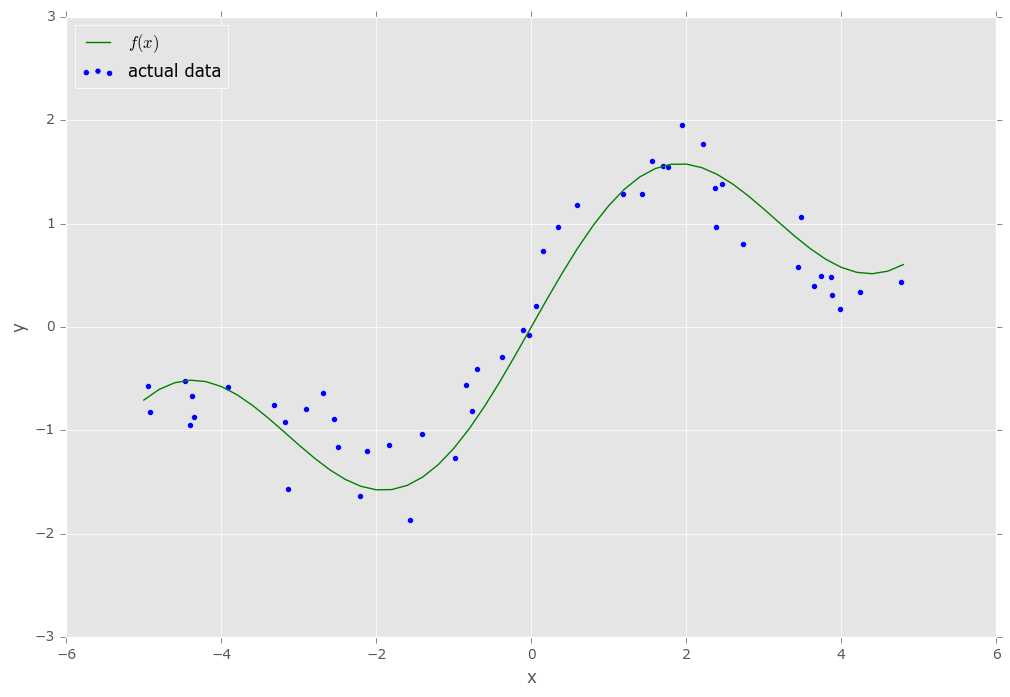

In [4]:
plt.plot(x_true, y_true, c='g', label='$f(x)$')
plt.scatter(x, y, label='actual data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

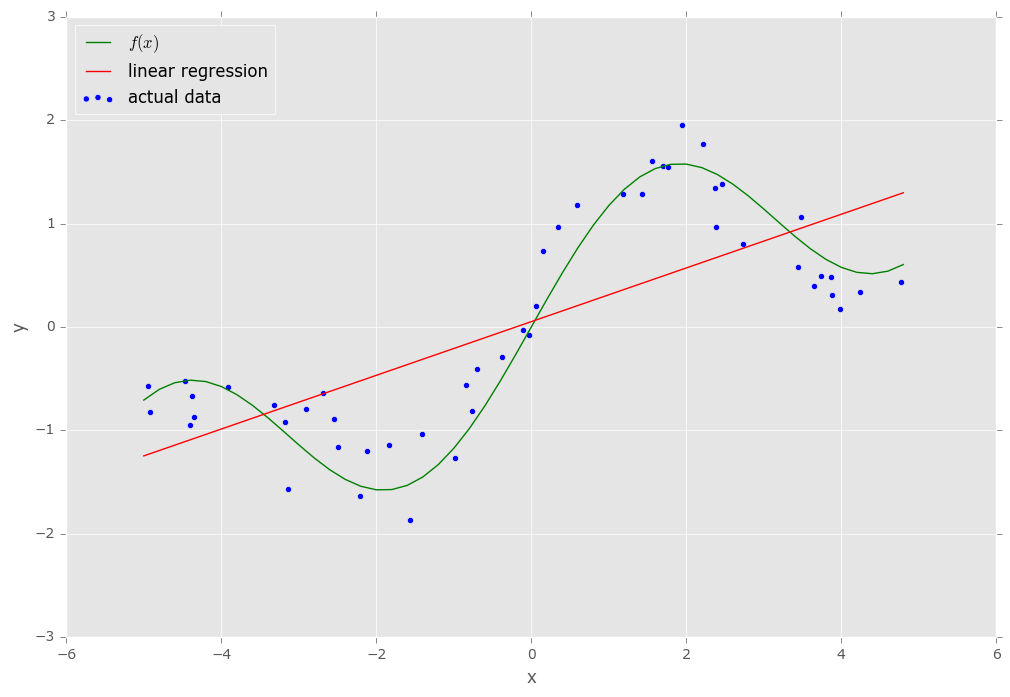

In [5]:
try:
    plot_linreg(x_true, y_true, x, y)
except:
    print u'Смотрите на доску'

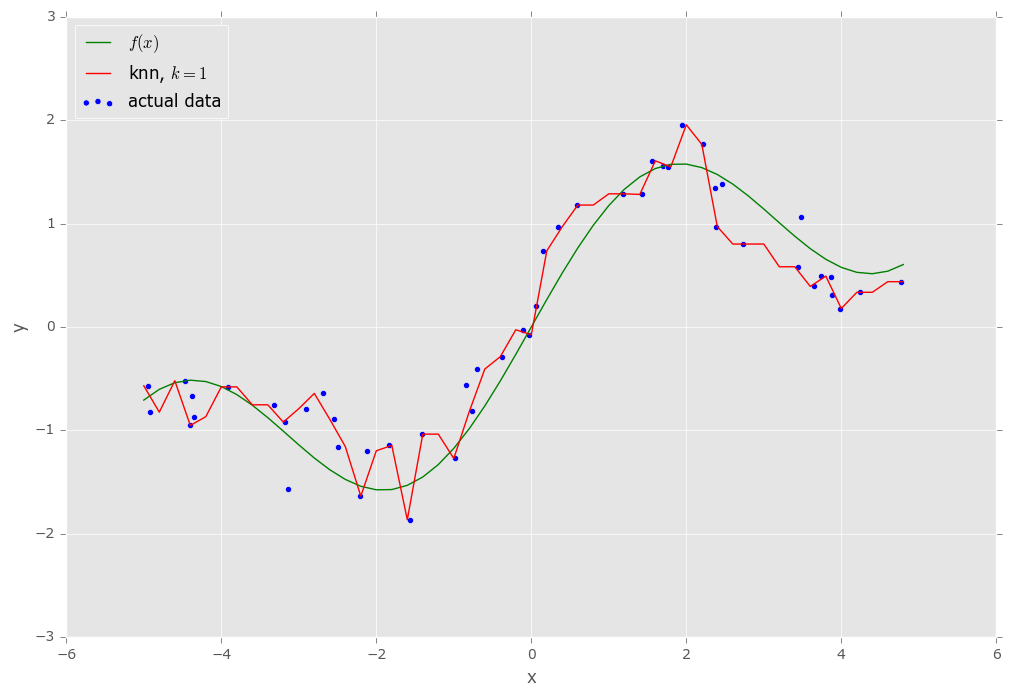

In [6]:
try:
    fig = interact(plot_knn, 
                   x_true=fixed(x_true), y_true=fixed(y_true), x=fixed(x), y=fixed(y), 
                   k=IntSlider(min=1, max=10, value=1))
except:
    print u'Увы, вновь на доске'

#### Разберемся c sklearn  и сами построим такой график

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')

knn.fit(x.reshape(-1,1), y) # Обучение (y - истинные значения)

y_hat = knn.predict(x_true.reshape(-1,1)) # Предсказание (y_hat - ответ модели)

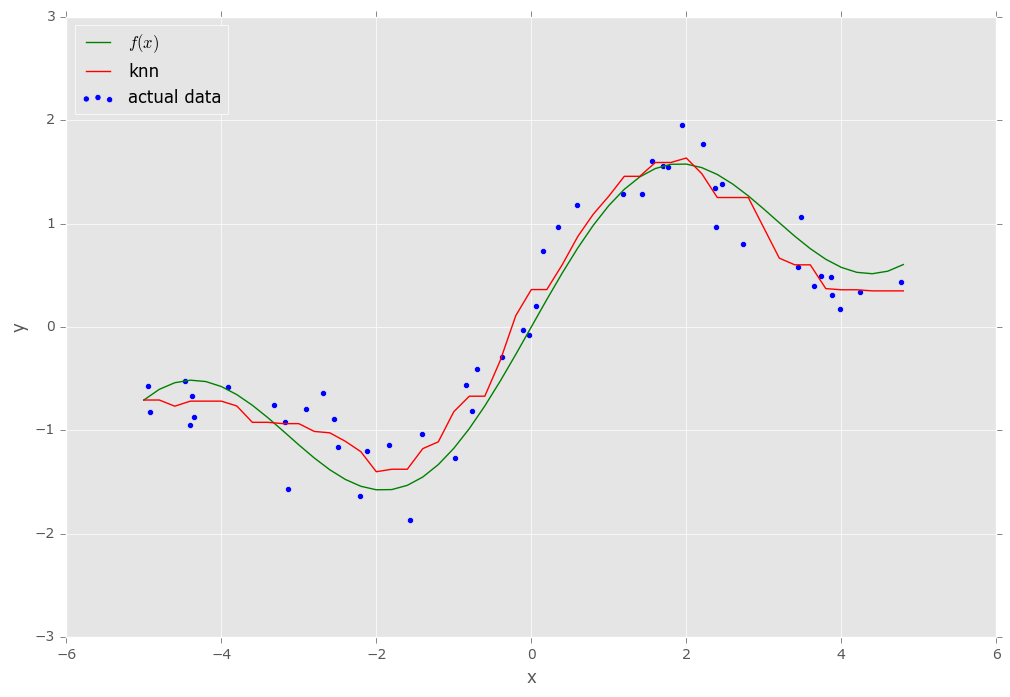

In [11]:
plt.plot(x_true, y_true, c='g', label='$f(x)$')
plt.scatter(x, y, label='actual data')
plt.plot(x_true, y_hat, c='r', label='knn')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

## Пример для классификации

In [20]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(noise=0.3, random_state=1234)

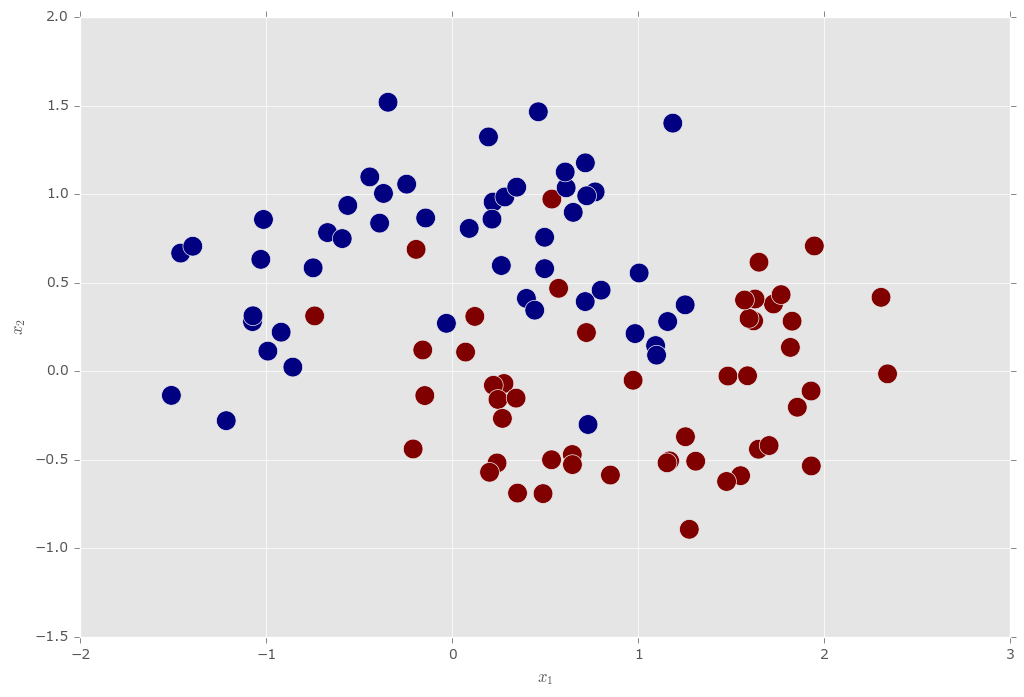

In [21]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, s=200)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

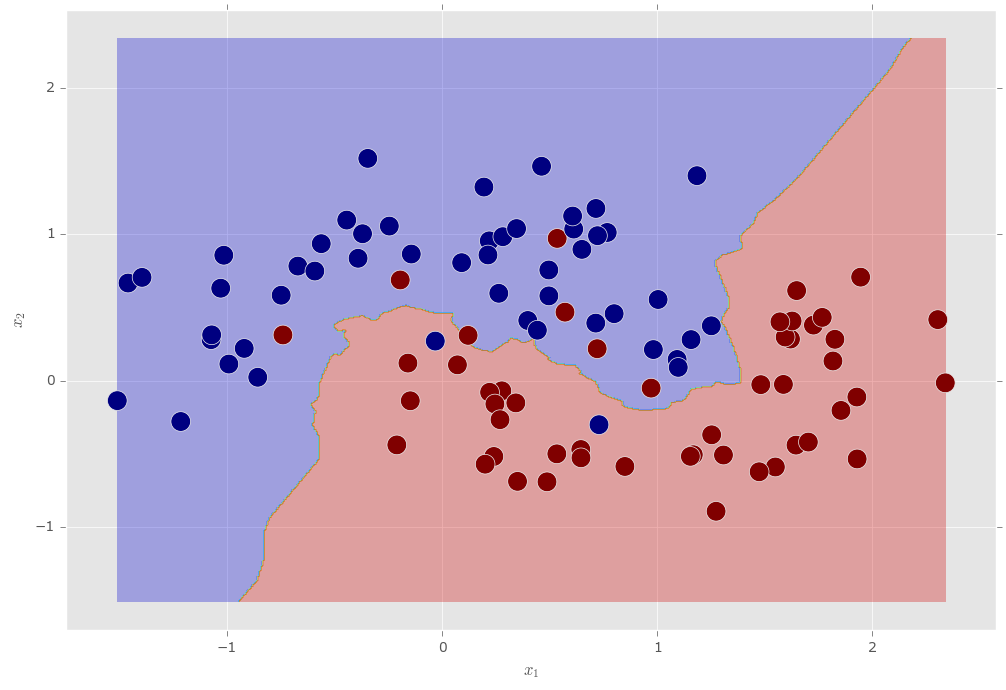

In [22]:
try:
    fig = interact(plot_knn_class,
                   X_moons=fixed(X_moons), y_moons=fixed(y_moons),
                   k=IntSlider(min=1, max=10, value=1))
except:
    print u'Доскааааа'

#### Задание

Попробуйте сами нарисовать такой график. С этим вам могут помочь функции `np.meshgrid()` и `plt.contourf()`

In [24]:
X_moons.shape # матрица с признаками

(100, 2)

In [25]:
y_moons.shape # вектор с ответами (классами)

(100,)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_moons, y_moons)

y_hat = knn.predict(X_moons) # Предсказание на обучающей выборке (бесполезно)

# Получим все возможные точки на плоскости
x1_range = np.linspace(X_moons[:,0].min(), X_moons[:,0].max(), 100)
x2_range = np.linspace(X_moons[:,1].min(), X_moons[:,1].max(), 100)

X1, X2 = np.meshgrid(x1_range, x2_range)
X1 # вектор x1 дублированный по строкам
X2 # вектор x2 дублированный по столбцам
# Мы хотим получить всевозможные пары x1-x2

X_all = np.c_[X1.reshape(-1,1), X2.reshape(-1,1)]

In [43]:
y_all = knn.predict(X_all)

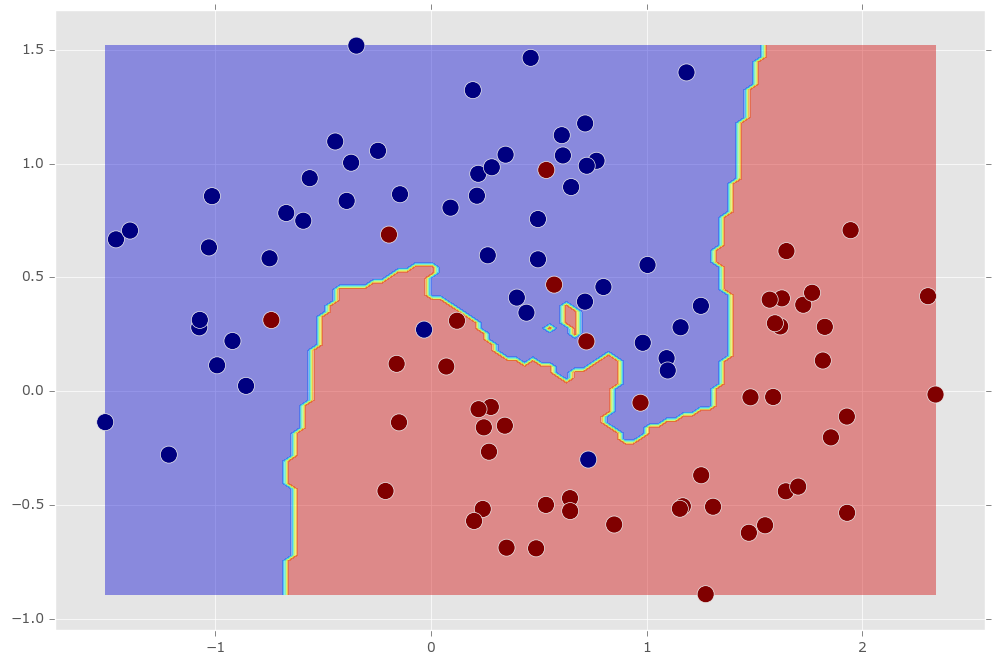

In [48]:
plt.contourf(X1, X2, y_all.reshape(100,-1), alpha=0.4) #  нарисовали области

plt.scatter(X_moons[:,0], X_moons[:,1], 
            c=y_moons, s=150) # нарисовали точки

# Взвешенный kNN

Вход: Обучающая выборка $X=(x_i,y_i)$, мера близости $d(\cdot, \cdot)$ и объект $\tilde{x}$<br/>

Найти $k$ ближайших объекта в $X$ c помощью $d(\tilde{x},\cdot)$ 

* (регрессия) вернуть среднее взвешенное значение* $$\hat{y} = \frac{\sum\limits_{j=1}^k w_{(j)} y_{(j)}}{\sum\limits_{j=1}^k w_{(j)}}$$
* (классификация) вернуть наиболее частую метку класса c учетом веса $$\hat{y} = \arg \max\limits_{y \in \{-1, 1\}}\sum\limits_{j=1}^k w_{(j)} [y_{(j)} == y] $$

## Варианты весов
* $w_{(j)} = \frac{k - j + 1}{k}$
* $w_{(j)} = 1/d(\tilde{x},x_{(j)})$
* $w_{(j)} = K(\frac{d(\tilde{x},x_{(j)})}{h}) $ Парзеновское окно (Parzen Window).
    * $K$ - ядро, $h$ - ширина окна
    
## Ядра
* $K(d, h) \propto \exp(- \frac{d^2}{2h^2})$ - gaussian kernel
* $K(d, h) \propto 1 if x < d$ - tophat kernel
* $K(d, h) \propto 1 - \frac{d^2}{h^2}$ - epanechnikov kernel
* $K(d, h) \propto \exp(-d/h)$ - exponential kernel
* $K(d, h) \propto 1 - d/h if d < h$ - linear kernel
* $K(d, h) \propto \cos(\frac{\pi d}{2h}) if x < h$ - linear kernel

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_0021.png'></center>    


#### Задание

Реализуйте взвешенный kNN с гауссовским ядром для предыдущей задачи

In [71]:
def gaussian_kernel(d, h=0.5):
    return np.exp(-(d**2)/(2*h**2))

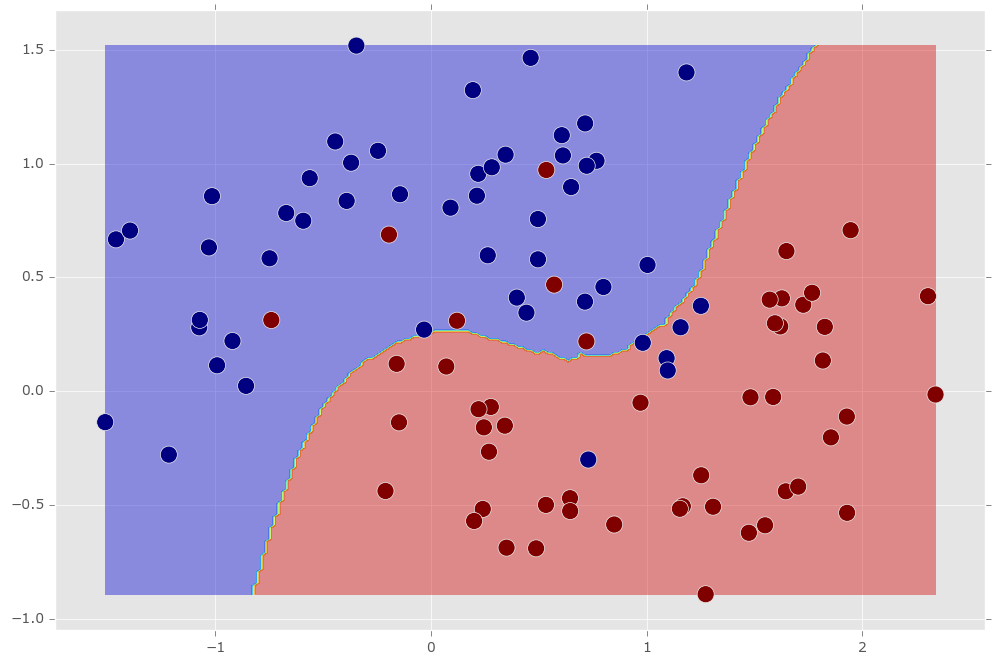

In [74]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=50, 
                           weights=gaussian_kernel)

knn.fit(X_moons, y_moons)

y_hat = knn.predict(X_moons) # Предсказание на обучающей выборке (бесполезно)

# Получим все возможные точки на плоскости
x1_range = np.linspace(X_moons[:,0].min(), X_moons[:,0].max(), 200)
x2_range = np.linspace(X_moons[:,1].min(), X_moons[:,1].max(), 200)

X1, X2 = np.meshgrid(x1_range, x2_range)
X1 # вектор x1 дублированный по строкам
X2 # вектор x2 дублированный по столбцам
# Мы хотим получить всевозможные пары x1-x2

y_all = knn.predict(X_all)

X_all = np.c_[X1.reshape(-1,1), X2.reshape(-1,1)]
plt.contourf(X1, X2, y_all.reshape(200,-1), alpha=0.4) #  нарисовали области

plt.scatter(X_moons[:,0], X_moons[:,1], 
            c=y_moons, s=150) # нарисовали точки

#### Задание (Дома в Калифорнии)

Есть довольно известный набор данных о стоимости домов в штате Калифорния. <br/>Каждое домохозяйство (дом) описывается рядом признаков. Требуется найти зависимость между этими признаками и  стоимостью дома.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

X = data.data
y = data.target

In [ ]:
print data.DESCR

In [ ]:
# Возьмем подвыборку
lllat, lllon = 33, -125
urlat, urlon = 42, -114

idx = (X[:, -1] <= urlon) & (X[:, -1] >= lllon) &\
      (X[:, -2] <= urlat) & (X[:, -2] >= lllat)

X = X[idx]
y = y[idx]

In [ ]:
# Нарисуем это дело
plt.figure(figsize=(10, 10))
try:
    import mpl_toolkits.basemap as bm

    m = bm.Basemap(
        llcrnrlon=lllon,
        llcrnrlat=lllat,
        urcrnrlon=urlon,
        urcrnrlat=urlat, 
        projection='merc',
        resolution='h'
    )

    m.drawcoastlines(linewidth=0.5)
    m.drawmapboundary(fill_color='#47A4C9', zorder=1)
    m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

    parallels = np.linspace(lllat, urlat, 10)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    # draw meridians
    meridians = np.linspace(lllon, urlon, 10)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

    m.scatter(X[:, -1], X[:, -2], latlon=True, cmap=plt.cm.hot,
              zorder=3, lw=0, c=y)
except ImportError:
    print u'Не судьба =('
    plt.scatter(X[:, -1], X[:, -2], cmap=plt.cm.hot, c=y)

Будем использовать только геолокацию домов в качестве признаков.

* Мера качества - MSE (mean squared error)
* Зафиксируем все гиперпараметры, кроме числа ближайших соседей.
* Разбейте данные случайным образом на 3 части - обучающую, валидационную и контрольную в пропорции 70/15/15.
* Переберите значение `k` от 1 до 15, выведите на графике ошибку при каждом `k` на обучающей и контрольной выборке
* Выберите "оптимальное" значение `k`. Является ли результат при этом `k` лучшим на контрольной выборке?

In [ ]:
### Your code here